# FINAL Assignment B - House Price Prediction

###Reading data from the Train CSV file into a Spark DataFrame <br><br>

1. import train data as a Spark DataFrame
2. header= True takes first row as header
3. assume datatype with inferSchema
4. specify null values as 'NA'

In [0]:
trainDF = spark.read.csv("/FileStore/shared_uploads/c10330971@mytudublin.ie/house-prices-advanced-regression-techniques/train.csv", header="true", inferSchema="true", nullValue="NA")
testDF = spark.read.csv("/FileStore/shared_uploads/c10330971@mytudublin.ie/house-prices-advanced-regression-techniques/test.csv", header="true", inferSchema="true", nullValue="NA")
#display(trainDF)

## Data Exploration

In [0]:
# Viewing general information about the data, such as count, mean min and max
display(trainDF.describe())

summary,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460
mean,730.5,56.897260273972606,null,70.04995836802665,10516.828082191782,null,null,null,null,null,null,null,null,null,null,null,null,6.0993150684931505,5.575342465753424,1971.267808219178,1984.8657534246574,null,null,null,null,null,103.68526170798899,null,null,null,null,null,null,null,443.6397260273973,null,46.54931506849315,567.2404109589041,1057.4294520547944,null,null,null,null,1162.626712328767,346.99246575342465,5.844520547945206,1515.463698630137,0.42534246575342466,0.057534246575342465,1.5650684931506849,0.38287671232876713,2.8664383561643834,1.0465753424657533,null,6.517808219178082,null,0.613013698630137,null,null,1978.5061638868744,null,1.7671232876712328,472.9801369863014,null,null,null,94.2445205479452,46.66027397260274,21.954109589041096,3.4095890410958902,15.060958904109588,2.758904109589041,null,null,null,43.489041095890414,6.321917808219178,2007.8157534246575,null,null,180921.19589041095
stddev,421.6100093688479,42.30057099381045,null,24.28475177448321,9981.26493237915,null,null,null,null,null,null,null,null,null,null,null,null,1.3829965467415926,1.1127993367127318,30.202904042525294,20.64540680770938,null,null,null,null,null,181.06620658721647,null,null,null,null,null,null,null,456.0980908409278,null,161.3192728065416,441.8669552924343,438.7053244594709,null,null,null,null,386.5877380410744,436.528435886257,48.62308143352024,525.4803834232024,0.5189106060898061,0.23875264627921197,0.5509158012954318,0.5028853810928912,0.8157780441442279,0.22033819838403076,null,1.6253932905840511,null,0.6446663863122297,null,null,24.68972476859027,null,0.7473150101111095,213.8048414533803,null,null,null,125.33879435172422,66.2560276766497,61.11914860172857,29.317330556781872,55.75741528187416,40.17730694453021,null,null,null,496.1230244579441,2.7036262083595113,1.3280951205521145,null,null,79442.50288288663
min,1,20,C (all),21,1300,Grvl,Grvl,IR1,Bnk,AllPub,Corner,Gtl,Blmngtn,Artery,Artery,1Fam,1.5Fin,1,1,1872,1950,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,0,Ex,Ex,BrkTil,Ex,Fa,Av,ALQ,0,ALQ,0,0,0,Floor,Ex,N,FuseA,334,0,0,334,0,0,0,0,0,0,Ex,2,Maj1,0,Ex,2Types,1900,Fin,0,0,Ex,Ex,N,0,0,0,0,0,0,Ex,GdPrv,Gar2,0,1,2006,COD,Abnorml,34900
max,1460,190,RM,313,215245,Pave,Pave,Reg,Lvl,NoSeWa,Inside,Sev,Veenker,RRNn,RRNn,TwnhsE,SLvl,10,9,2010,2010,Shed,WdShngl,WdShing,Wd Shng,Stone,1600,TA,TA,Wood,TA,TA,No,Unf,5644,Unf,1474,2336,6110,Wall,TA,Y,SBrkr,4692,2065,572,5642,3,2,3,2,8,3,TA,14,Typ,3,TA,Detchd,2010,Unf,4,1418,TA,TA,Y,857,547,552,508,480,738,Gd,MnWw,TenC,15500,12,2010,WD,Partial,755000


Viewing shape of the dataset

In [0]:
def sparkShape(dataFrame):
    return (dataFrame.count(), len(dataFrame.columns))
pyspark.sql.dataframe.DataFrame.shape = sparkShape
print(trainDF.shape())

(1460, 81)

In [0]:
# Checking the schema
trainDF.printSchema()

root
-- Id: integer (nullable = true)
-- MSSubClass: integer (nullable = true)
-- MSZoning: string (nullable = true)
-- LotFrontage: integer (nullable = true)
-- LotArea: integer (nullable = true)
-- Street: string (nullable = true)
-- LotShape: string (nullable = true)
-- LandContour: string (nullable = true)
-- LotConfig: string (nullable = true)
-- LandSlope: string (nullable = true)
-- Neighborhood: string (nullable = true)
-- Condition1: string (nullable = true)
-- Condition2: string (nullable = true)
-- BldgType: string (nullable = true)
-- HouseStyle: string (nullable = true)
-- OverallQual: integer (nullable = true)
-- OverallCond: integer (nullable = true)
-- YearBuilt: integer (nullable = true)
-- YearRemodAdd: integer (nullable = true)
-- RoofStyle: string (nullable = true)
-- RoofMatl: string (nullable = true)
-- Exterior1st: string (nullable = true)
-- Exterior2nd: string (nullable = true)
-- MasVnrType: string (nullable = true)
-- MasVnrArea: integer (nullable = true)
-- ExterQual: string (nullable = true)
-- ExterCond: string (nullable = true)
-- Foundation: string (nullable = true)
-- BsmtQual: string (nullable = true)
-- BsmtCond: string (nullable = true)
-- BsmtExposure: string (nullable = true)
-- BsmtFinType1: string (nullable = true)
-- BsmtFinSF1: integer (nullable = true)
-- BsmtFinType2: string (nullable = true)
-- BsmtFinSF2: integer (nullable = true)
-- BsmtUnfSF: integer (nullable = true)
-- TotalBsmtSF: integer (nullable = true)
-- Heating: string (nullable = true)
-- HeatingQC: string (nullable = true)
-- CentralAir: string (nullable = true)
-- Electrical: string (nullable = true)
-- 1stFlrSF: integer (nullable = true)
-- 2ndFlrSF: integer (nullable = true)
-- LowQualFinSF: integer (nullable = true)
-- GrLivArea: integer (nullable = true)
-- BsmtFullBath: integer (nullable = true)
-- BsmtHalfBath: integer (nullable = true)
-- FullBath: integer (nullable = true)
-- HalfBath: integer (nullable = true)
-- BedroomAbvGr: integer (nullable = true)
-- KitchenAbvGr: integer (nullable = true)
-- KitchenQual: string (nullable = true)
-- TotRmsAbvGrd: integer (nullable = true)
-- Functional: string (nullable = true)
-- Fireplaces: integer (nullable = true)
-- GarageType: string (nullable = true)
-- GarageFinish: string (nullable = true)
-- GarageCars: integer (nullable = true)
-- GarageArea: integer (nullable = true)
-- GarageQual: string (nullable = true)
-- GarageCond: string (nullable = true)
-- PavedDrive: string (nullable = true)
-- WoodDeckSF: integer (nullable = true)
-- OpenPorchSF: integer (nullable = true)
-- EnclosedPorch: integer (nullable = true)
-- 3SsnPorch: integer (nullable = true)
-- ScreenPorch: integer (nullable = true)
-- PoolArea: integer (nullable = true)
-- MiscVal: integer (nullable = true)
-- MoSold: integer (nullable = true)
-- YrSold: integer (nullable = true)
-- SaleType: string (nullable = true)
-- SaleCondition: string (nullable = true)
-- SalePrice: integer (nullable = true)

#### Sale Price - standard vs log

In [0]:
salePriceDF = trainDF.select("SalePrice")
display(salePriceDF)

SalePrice
208500
181500
223500
140000
250000
143000
307000
200000
129900
118000


In [0]:
from pyspark.sql.functions import col, log

logDF_1 = trainDF.withColumn("SalePriceLog", log("SalePrice"))
logDFSale = logDF_1.select("SalePriceLog")
display(logDFSale)

SalePriceLog
12.247694320220994
12.109010932687042
12.31716669303576
11.84939770159144
12.429216196844383
11.870599909242044
12.634603026569334
12.206072645530174
11.77452020265869
11.678439903447801


##### Observation
A right skew can be seen, when the log is used the ditribution is transformed to normal. This means we can assume linearity in regression

#### Correlation Matrix

In [0]:
pdDF = trainDF.toPandas()
pdDF.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

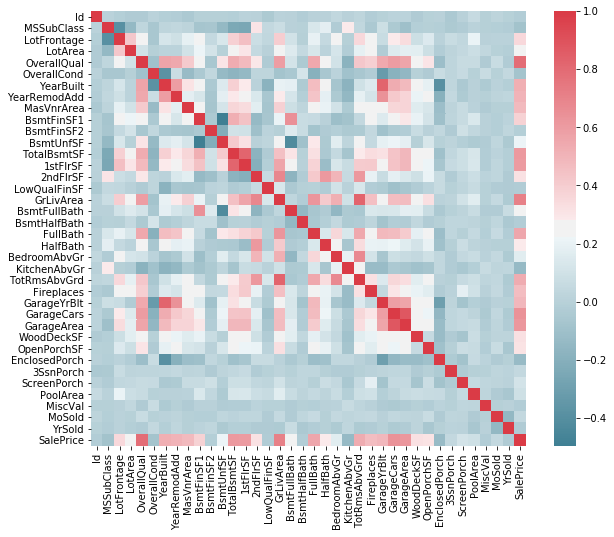

In [0]:
import seaborn as sns
from matplotlib import pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = pdDF.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

### Top 9 correlated values

In [0]:
top9 = trainDF.select("OverallQual","GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt").toPandas()

top9.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000


#### Overall Quality vs Sales Price

In [0]:
SalePriceVsOverallQual = trainDF.select("SalePrice", "OverallQual")
display(SalePriceVsOverallQual)

SalePrice,OverallQual
208500,7
181500,6
223500,7
140000,7
250000,8
143000,5
307000,8
200000,7
129900,7
118000,5


#### Ground Living Area vs Sales Price

In [0]:
SalePriceVsGrLivArea = trainDF.select("SalePrice", "GrLivArea")
display(SalePriceVsGrLivArea)

SalePrice,GrLivArea
208500,1710
181500,1262
223500,1786
140000,1717
250000,2198
143000,1362
307000,1694
200000,2090
129900,1774
118000,1077


#### GarageCars vs SalePrice

In [0]:
SalePriceVsGarageCars = trainDF.select("SalePrice", "GarageCars")
display(SalePriceVsGarageCars)

SalePrice,GarageCars
208500,2
181500,2
223500,2
140000,3
250000,3
143000,2
307000,2
200000,2
129900,2
118000,1


#### GarageArea vs SalePrice

In [0]:
SalePriceVsGarageArea = trainDF.select("SalePrice", "GarageArea")
display(SalePriceVsGarageArea)

SalePrice,GarageArea
208500,548
181500,460
223500,608
140000,642
250000,836
143000,480
307000,636
200000,484
129900,468
118000,205


#### 1stFlrSF vs SalePrice

In [0]:
SalePriceVs1stFlrSF = trainDF.select("SalePrice", "1stFlrSF")
display(SalePriceVs1stFlrSF)

SalePrice,1stFlrSF
208500,856
181500,1262
223500,920
140000,961
250000,1145
143000,796
307000,1694
200000,1107
129900,1022
118000,1077


#### TotRmsAbvGrd vs SalePrice

In [0]:
SalePriceVsTotRmsAbvGrd = trainDF.select("SalePrice", "TotRmsAbvGrd")
display(SalePriceVsTotRmsAbvGrd)

SalePrice,TotRmsAbvGrd
208500,8
181500,6
223500,6
140000,7
250000,9
143000,5
307000,7
200000,7
129900,8
118000,5


#### TotRmsAbvGrd vs SalePrice

In [0]:
SalePriceVsYearBuilt = trainDF.select("SalePrice", "YearBuilt")
display(SalePriceVsYearBuilt)

SalePrice,YearBuilt
208500,2003
181500,1976
223500,2001
140000,1915
250000,2000
143000,1993
307000,2004
200000,1973
129900,1931
118000,1939


## Data Cleaning

#### Null Values and dealing with them
<br> Viewing null values

In [0]:
from pyspark.sql.functions import col,isnan, when, count
display(trainDF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in trainDF.columns]))

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


Viewing null percentages

In [0]:
import pandas as pd

pd_train = spark.read.csv("/FileStore/shared_uploads/c10330971@mytudublin.ie/house-prices-advanced-regression-techniques/train.csv", header="true", inferSchema="true", nullValue="NA").toPandas()

total = pd_train.isnull().sum().sort_values(ascending=False)
percent = (pd_train.isnull().sum()/pd_train.shape[0]).sort_values(ascending=False)

missing = pd.concat([total, percent], axis=1, keys=['Total', 'Perc_missing'])
missing.head(15)

,Total,Perc_missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Dropping unecessary columns
<br>
To clean the data I will drop all columns with over 50% of null values (or nearly 50 like FireplaceQu)

In [0]:
over50_test = ['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageYrBlt', 'Utilities']
trainDF = trainDF.select([column for column in trainDF.columns if column not in over50_test])
testDF = testDF.select([column for column in testDF.columns if column not in over50_test])

Replacing all numerical empty values with mean

In [0]:
from pyspark.sql.functions import mean

# Training Data
lotFrontageMean = trainDF.select(mean("LotFrontage")).collect()
lotFrontageMean =lotFrontageMean[0][0]
trainDF = trainDF.na.fill(lotFrontageMean,["LotFrontage"])

meanMasVnrArea = trainDF.select(mean("MasVnrArea")).collect()
meanMasVnrArea = meanMasVnrArea[0][0]
trainDF = trainDF.na.fill(meanMasVnrArea,["MasVnrArea"])

# Testing Data
lotFrontageMean = testDF.select(mean("LotFrontage")).collect()
lotFrontageMean =lotFrontageMean[0][0]
testDF = testDF.na.fill(lotFrontageMean,["LotFrontage"])

meanMasVnrArea = testDF.select(mean("MasVnrArea")).collect()
meanMasVnrArea = meanMasVnrArea[0][0]
testDF = testDF.na.fill(meanMasVnrArea,["MasVnrArea"])

Replacing NA's for string values with the most common value using Regex. I discovered these values using <br>display(df.groupBy("COL_NAME").count())

In [0]:
from pyspark.sql.functions import regexp_replace

# Training Data
trainDF = trainDF.withColumn('MasVnrType', regexp_replace('MasVnrType', 'NA', 'None'))
trainDF = trainDF.withColumn('MSZoning', regexp_replace('MSZoning', 'NA', 'RL'))
trainDF = trainDF.withColumn('MasVnrType', regexp_replace('MasVnrType', 'NA', 'None'))
trainDF = trainDF.withColumn('BsmtQual', regexp_replace('BsmtQual', 'NA', 'TA'))
trainDF = trainDF.withColumn('BsmtCond', regexp_replace('BsmtCond', 'NA', 'TA'))
trainDF = trainDF.withColumn('BsmtFinType1', regexp_replace('BsmtFinType1', 'NA', 'GLQ'))
trainDF = trainDF.withColumn('BsmtFinType2', regexp_replace('BsmtFinType2', 'NA', 'GLQ'))
trainDF = trainDF.withColumn('GarageType', regexp_replace('GarageType', 'NA', 'Attchd'))
trainDF = trainDF.withColumn('GarageFinish', regexp_replace('GarageFinish', 'NA', 'Unf'))
trainDF = trainDF.withColumn('GarageQual', regexp_replace('GarageQual', 'NA', 'TA'))
trainDF = trainDF.withColumn('GarageCond', regexp_replace('GarageCond', 'NA', 'TA'))
trainDF = trainDF.withColumn('BsmtExposure', regexp_replace('BsmtExposure', 'NA', 'No'))
trainDF = trainDF.withColumn('Electrical', regexp_replace('Electrical', 'NA', 'SBrkr'))

# Testing Data
testDF = testDF.withColumn('MasVnrType', regexp_replace('MasVnrType', 'NA', 'None'))
testDF = testDF.withColumn('MSZoning', regexp_replace('MSZoning', 'NA', 'RL'))
testDF = testDF.withColumn('MasVnrType', regexp_replace('MasVnrType', 'NA', 'None'))
testDF = testDF.withColumn('BsmtQual', regexp_replace('BsmtQual', 'NA', 'TA'))
testDF = testDF.withColumn('BsmtCond', regexp_replace('BsmtCond', 'NA', 'TA'))
testDF = testDF.withColumn('BsmtFinType1', regexp_replace('BsmtFinType1', 'NA', 'GLQ'))
testDF = testDF.withColumn('BsmtFinType2', regexp_replace('BsmtFinType2', 'NA', 'GLQ'))
testDF = testDF.withColumn('GarageType', regexp_replace('GarageType', 'NA', 'Attchd'))
testDF = testDF.withColumn('GarageFinish', regexp_replace('GarageFinish', 'NA', 'Unf'))
testDF = testDF.withColumn('GarageQual', regexp_replace('GarageQual', 'NA', 'TA'))
testDF = testDF.withColumn('GarageCond', regexp_replace('GarageCond', 'NA', 'TA'))
testDF = testDF.withColumn('BsmtExposure', regexp_replace('BsmtExposure', 'NA', 'No'))
testDF = testDF.withColumn('Electrical', regexp_replace('Electrical', 'NA', 'SBrkr'))

Casting correct datatypes on columns

In [0]:
for col in ["LotFrontage", "MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]:
    testDF = testDF.withColumn(col, testDF[col].cast('int'))
    trainDF = trainDF.withColumn(col, trainDF[col].cast('int'))

Assigning Categorical Columns using datatypes

In [0]:
train_string_columns = []

for col, dtype in trainDF.dtypes:
    if dtype == 'string':
        train_string_columns.append(col)

### Create full Pipeline to training set

Encode Categorical Values by checking if the column is in train_string_columns

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

indexers = [StringIndexer(inputCol=column, outputCol=column+'_index', handleInvalid='keep') for column in train_string_columns]
onehot = [OneHotEncoder(inputCol=column+'_index', outputCol=column+'onehot', handleInvalid='keep') for column in train_string_columns]

pipeline = Pipeline(stages=indexers + onehot)
train_indexed = pipeline.fit(trainDF).transform(trainDF)

In [0]:
test_string_columns = []

for col, dtype in testDF.dtypes:
    if dtype == 'string':
        test_string_columns.append(col)

In [0]:
test_string_columns

Out[225]: ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Create full Pipeline to test set

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

indexers2 = [StringIndexer(inputCol=column, outputCol=column+'_index', handleInvalid='keep') for column in test_string_columns]
onehot2 = [OneHotEncoder(inputCol=column+'_index', outputCol=column+'onehot', handleInvalid='keep') for column in test_string_columns]

pipeline2 = Pipeline(stages=indexers2+onehot2)
test_indexed = pipeline2.fit(testDF).transform(testDF)

Creating indexed versions of the numerical values

In [0]:
def get_dtype(df,colname):
    return [dtype for name, dtype in df.dtypes if name == colname][0]

num_cols_train = []
for col in train_indexed.columns:
    if get_dtype(train_indexed,col) != 'string':
        num_cols_train.append(str(col))
        
num_cols_test = []
for col in test_indexed.columns:
    if get_dtype(test_indexed,col) != 'string':
        num_cols_test.append(str(col))

train_indexed = train_indexed.select(num_cols_train)
test_indexed = test_indexed.select(num_cols_test)

## Vector Assembler

Pyspark requires all the feature cols in a single vector to work. I will use the Vector Assembler to combine all the transformed feature cols

In [0]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = train_indexed.drop('SalePrice').columns, outputCol = 'features').setHandleInvalid('keep')

train_vector = vectorAssembler.transform(train_indexed)

In [0]:
vectorAssembler2 = VectorAssembler(inputCols = test_indexed.columns, outputCol = 'features').setHandleInvalid('keep')

test_vector = vectorAssembler2.transform(test_indexed)

In [0]:
from pyspark.sql.functions import lit

test_vector = test_vector.withColumn("SalePrice", lit(0))

create a training and test set

In [0]:
splits = train_vector.randomSplit([0.7, 0.3])
train = splits[0]
val = splits[1]

## Models

Fit various PySpark ML Models to the data and see what works best. R2 is calculated to check the accuracy of the model

In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='SalePrice', maxIter=10, 
                      regParam=0.8, elasticNetParam=0.1)
lr_model = lr.fit(train)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(val)
lr_predictions.select("prediction","SalePrice","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

RMSE: 22649.507471
r2: 0.919836
+------------------+---------+--------------------+
 prediction|SalePrice| features|
+------------------+---------+--------------------+
216620.96118509094| 223500|(342,[0,1,2,3,4,5...|
180885.46594585432| 140000|(342,[0,1,2,3,4,5...|
 274062.2628457465| 307000|(342,[0,1,2,3,4,5...|
117231.59537969809| 118000|(342,[0,1,2,3,4,5...|
 407708.3707243268| 345000|(342,[0,1,2,3,4,5...|
+------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.892422

In [0]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol = 'features', labelCol='SalePrice', 
                           maxDepth=20, 
                           minInstancesPerNode=2,
                           bootstrap=True
                          )
rf_model = rf.fit(train)

rf_predictions = rf_model.transform(val)
rf_predictions.select("prediction","SalePrice","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
rf_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="r2")

rf_evaluator2 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="rmse")


print("R Squared (R2) on val data = %g" % rf_evaluator.evaluate(rf_predictions))
print("RSME on val data = %g" % rf_evaluator2.evaluate(rf_predictions))

+-----------------+---------+--------------------+
 prediction|SalePrice| features|
+-----------------+---------+--------------------+
 213241.325| 223500|(342,[0,1,2,3,4,5...|
254125.7333333333| 140000|(342,[0,1,2,3,4,5...|
273642.0333333333| 307000|(342,[0,1,2,3,4,5...|
 120595.25| 118000|(342,[0,1,2,3,4,5...|
449199.5833333333| 345000|(342,[0,1,2,3,4,5...|
+-----------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.872912
RSME on val data = 27785.7

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='SalePrice',
                                                  maxDepth=20, minInstancesPerNode=2)

dt_model = dt.fit(train)
dt_predictions = dt_model.transform(val)


dt_predictions.select("prediction","SalePrice","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
dt_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="r2")
dt_evaluator2 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="rmse")

print("R Squared (R2) on val data = %g" % dt_evaluator.evaluate(dt_predictions))
print("RSME on val data = %g" % dt_evaluator2.evaluate(dt_predictions))

+-----------------+---------+--------------------+
 prediction|SalePrice| features|
+-----------------+---------+--------------------+
 253789.0| 223500|(342,[0,1,2,3,4,5...|
 222000.0| 140000|(342,[0,1,2,3,4,5...|
277520.3333333333| 307000|(342,[0,1,2,3,4,5...|
 131950.0| 118000|(342,[0,1,2,3,4,5...|
 390711.5| 345000|(342,[0,1,2,3,4,5...|
+-----------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.794533
RSME on val data = 35329.6

### Making Predictions on the test data

In [0]:
rf_predictions2 = rf_model.transform(test_vector)

pred = rf_predictions2.select("Id", "prediction")
pred = pred.withColumnRenamed("prediction","SalePrice")

###Saving the file from a Spark Dataframe to a CSV File <br><br>

1. Use write function with mode overwrite
2. header= True writes the header into the CSV file (required for the submission)

In [0]:
pred \
  .write \
  .mode('overwrite') \
  .option('header', 'true') \
  .csv('output.csv')